In [1]:
import os
import sys
sys.path.append('./src')
import pickle
import matplotlib.pyplot as plt
from src.utils import *

# Define Your Session

In [2]:
session_path = 'results/6f5e6af422d0a366e42ecb4518ce7e0f' # Define your session path

# Prediction Visualization

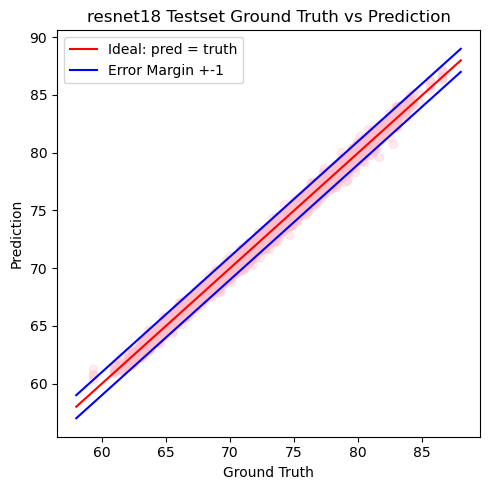

In [3]:
pred_vis(session_path, '', False)

In [ ]:
def worst_pred(session_path, data_path, idx, mode):
    pred_path = os.path.join(session_path, 'pred.json')

    pred_info = json2dict(pred_path)
    gt = np.array(pred_info['true_labels']).reshape(1, -1)
    pred = np.array(pred_info['predictions']).reshape(1, -1)

    if mode == 'abs':
        diff_abs = ... 
    elif mode == 'h':
        diff_h = ...
    elif mode == 'l':
        diff_l = ...
    else:
        print('Warning: Mode argument is not recognized.')
        return

    target_idx = ...


worst_pred(session_path, 0, 'abs')